In [106]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

### _csv 파일 가져오기_

In [2]:
df = pd.read_csv('~/src/properties_2016.csv')

/Users/quartz/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [79]:
df.head(10)

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN
5,10898347,NaN,NaN,NaN,0.0,0.0,4.0,7.0,NaN,NaN,...,1.0,NaN,176383.0,283315.0,2015.0,106932.0,3661.28,NaN,NaN,NaN
6,10933547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.34,NaN,NaN,NaN
7,10940747,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,1.0,NaN,101998.0,688486.0,2015.0,586488.0,7857.84,NaN,NaN,NaN
8,10954547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
9,10976347,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,218440.0,261201.0,2015.0,42761.0,4054.76,NaN,NaN,NaN


In [ ]:
submission = pd.read_csv('~/src/sample_submission.csv')
submission.tail(5)

In [ ]:
train2016 = pd.read_csv('~/src/train_2016.csv')
train2016.tail(5)

## _bathfamily_

In [ ]:
bathfamily = ["bathroomcnt", "calculatedbathnbr", "threequarterbathnbr", "fullbathcnt"]
bathfamily_df = pd.DataFrame(columns=bathfamily)
bathfamily_df

In [ ]:
for i in bathfamily:
    bathfamily_df[i] = df[i]
bathfamily_df.tail()

In [ ]:
for i in bathfamily:
    bathfamily_df[i].fillna(0, inplace=True)
bathfamily_df.tail()

In [ ]:
bathfamily_df.head()

In [ ]:
sns.pairplot(bathfamily_df)
plt.show()

In [ ]:
taxfamily = ['taxvaluedollarcnt', 'structuretaxvaluedollarcnt',\
             'landtaxvaluedollarcnt', 'taxamount']
taxfamily_df = pd.DataFrame(columns=taxfamily)

for i in taxfamily:
    taxfamily_df[i] = df[i]
taxfamily_df.tail()

## _taxfamily_

In [ ]:
# 데이터프레임 만들기

taxfamily = ['taxvaluedollarcnt', 'structuretaxvaluedollarcnt',\
             'landtaxvaluedollarcnt', 'taxamount']
taxfamily_df = pd.DataFrame(columns=taxfamily)
taxfamily_df.fillna(value=0, inplace=True)
taxfamily_df.tail()

In [ ]:
# 데이터프레임에 데이터 채워넣기

for i in taxfamily:
    taxfamily_df[i] = df[i]
taxfamily_df.tail()

In [ ]:
# NaN value, 0으로 바꾸기

taxfamily_df.fillna(value=0, inplace=True)
taxfamily_df.tail()

In [ ]:
# 새로운 속성 structure+land 만들기

taxfamily_df['structure+land'] = taxfamily_df['structuretaxvaluedollarcnt'] + \
taxfamily_df['landtaxvaluedollarcnt']
taxfamily_df.tail()

In [ ]:
sns.pairplot(taxfamily_df)
plt.show()

#### _taxvaluedollarcnt : The total tax assessed value of the parcel_

In [ ]:
taxvaluedollarcnt_df = df.groupby(['taxvaluedollarcnt']).size().reset_index(name='counts')
taxvaluedollarcnt_df

In [ ]:
print(np.mean(taxvaluedollarcnt_df['taxvaluedollarcnt'].values))
print(np.median(taxvaluedollarcnt_df['taxvaluedollarcnt'].values))

In [ ]:
x = taxvaluedollarcnt_df['taxvaluedollarcnt'].values
y = taxvaluedollarcnt_df['counts'].values

plt.bar(x, y)
plt.show()

In [ ]:
x = taxvaluedollarcnt_df['taxvaluedollarcnt'].values
y = taxvaluedollarcnt_df['counts'].values

plt.subplot(2, 2, 1)
plt.plot(x)
plt.show()

plt.subplot(2, 2, 2)
plt.plot(x)
plt.xlim(638000, 639000)
plt.show()

plt.subplot(2, 2, 3)
plt.plot(x)
plt.xlim(638500, 639000)
plt.show()

plt.subplot(2, 2, 4)
plt.plot(x)
plt.xlim(0, 638500)
plt.show()

## _finishedsquare family_

In [107]:
finishedsquare = ['calculatedfinishedsquarefeet', 'finishedfloor1squarefeet', 'finishedsquarefeet50']
finishedsquare

['calculatedfinishedsquarefeet',
 'finishedfloor1squarefeet',
 'finishedsquarefeet50']

In [ ]:
finishedsquare_df = pd.DataFrame(columns=finishedsquare)
for i in finishedsquare:
    finishedsquare_df[i] = df[i]

In [ ]:
finishedsquare_df.fillna(0, inplace=True)

In [ ]:
x = finishedsquare_df['calculatedfinishedsquarefeet'].values

In [ ]:
sns.pairplot(finishedsquare_df)
plt.show()

In [108]:
finishedsquare = ['calculatedfinishedsquarefeet', 'finishedsquarefeet6', 'finishedsquarefeet12',\
                                          'finishedsquarefeet13', 'finishedsquarefeet15']
finishedsquare

['calculatedfinishedsquarefeet',
 'finishedsquarefeet6',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15']

In [109]:
finishedsquare_df = pd.DataFrame(columns=finishedsquare)
finishedsquare_df

,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15


In [110]:
for i in finishedsquare:
    finishedsquare_df[i] = df[i]
finishedsquare_df.head(10)

,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,73026.0,NaN,NaN,NaN,73026.0
3,5068.0,NaN,NaN,NaN,5068.0
4,1776.0,NaN,NaN,NaN,1776.0
5,2400.0,NaN,NaN,NaN,2400.0
6,NaN,NaN,NaN,NaN,NaN
7,3611.0,NaN,NaN,NaN,3611.0
8,NaN,NaN,NaN,NaN,NaN
9,3754.0,NaN,NaN,NaN,3754.0


In [111]:
# fillna

for i in finishedsquare:
    finishedsquare_df[i].fillna(0, inplace=True)
finishedsquare_df.head()

,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,73026.0,0.0,0.0,0.0,73026.0
3,5068.0,0.0,0.0,0.0,5068.0
4,1776.0,0.0,0.0,0.0,1776.0


In [112]:
finishedsquare_df['finishedsquaresum'] = int(0)
finishedsquare_df.tail()

,calculatedfinishedsquarefeet,finishedsquarefeet6,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquaresum
2985212,0.0,0.0,0.0,0.0,0.0,0
2985213,0.0,0.0,0.0,0.0,0.0,0
2985214,0.0,0.0,0.0,0.0,0.0,0
2985215,0.0,0.0,0.0,0.0,0.0,0
2985216,0.0,0.0,0.0,0.0,0.0,0


In [113]:
for i in finishedsquare[1:5]:
    finishedsquare_df['finishedsquaresum'] += finishedsquare_df[i]

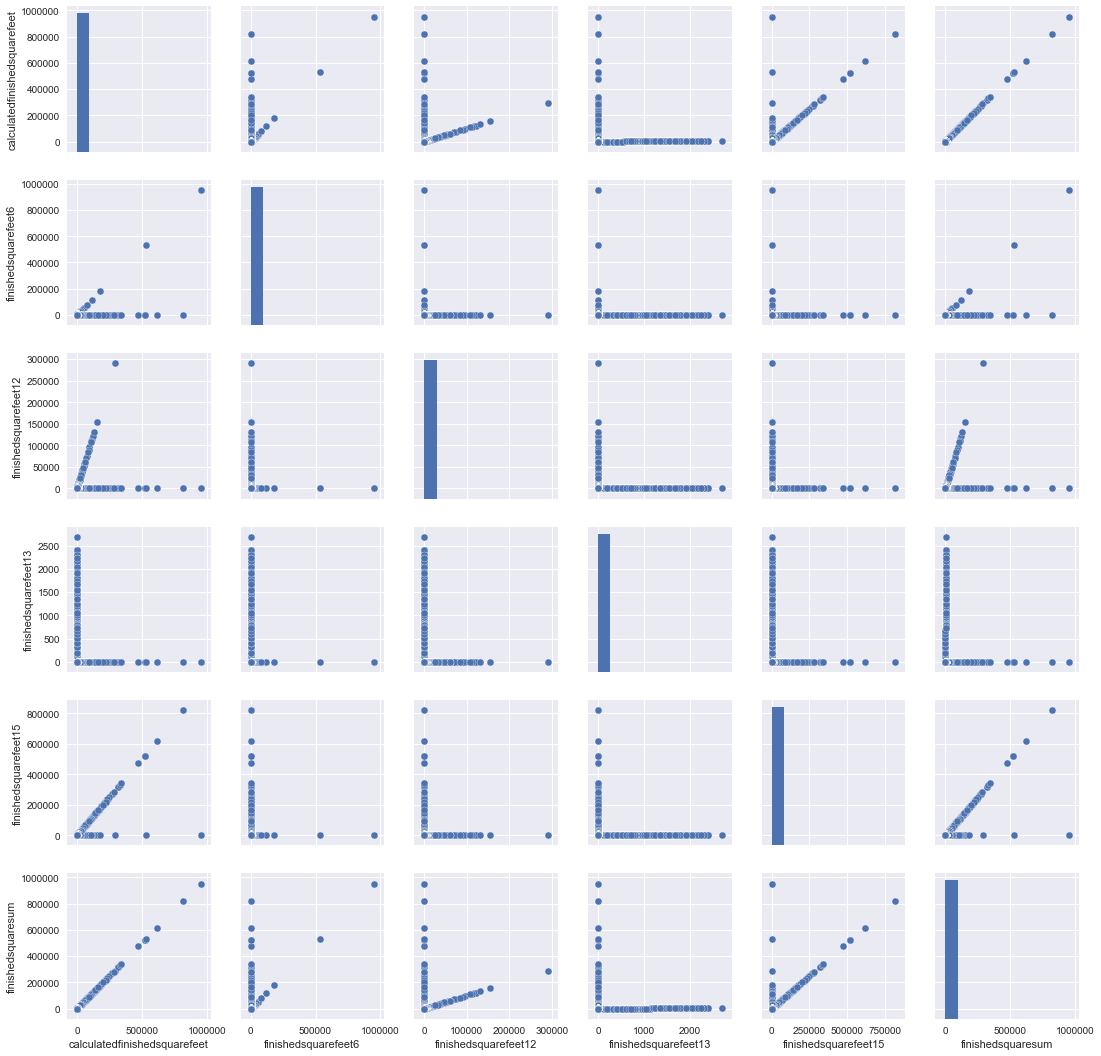

In [114]:
sns.pairplot(finishedsquare_df)
plt.show()

## _pool family_

In [ ]:
poolfamily = ['poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7']
poolfamily

In [ ]:
poolfamily_df = pd.DataFrame(columns=poolfamily)
poolfamily_df

In [ ]:
for i in poolfamily:
    poolfamily_df[i] = df[i]
poolfamily_df

In [ ]:
poolfamily_df.dropna()

In [ ]:
y = poolfamily_df['poolcnt']
plt.hist(y, bins=10000000)
plt.show()

In [ ]:
# fillna

for i in poolfamily:
    poolfamily_df[i].fillna(0, inplace=True)
poolfamily_df.tail()

In [ ]:
sns.pairplot(poolfamily_df)
plt.show()

In [ ]:
poolfamily

In [ ]:
poolfamily_df

## _property family_

In [ ]:
property = ['propertylandusetypeid', 'propertycountylandusecode']
property

In [ ]:
property_df = pd.DataFrame(columns=property)
property_df

In [ ]:
for i in property:
    property_df[i] = df[i]

In [ ]:
propertycountylandusecode_df = df.groupby(['propertycountylandusecode']).size().reset_index(name="counts")
propertycountylandusecode_df.sort_values(by = "counts", ascending=False).head(10)

In [ ]:
propertylandusetypeid_df = df.groupby(['propertylandusetypeid']).size().reset_index(name="counts")
propertylandusetypeid_df.sort_values(by = "counts", ascending = False).head(10)

In [ ]:
property_df2 = df.groupby(['propertylandusetypeid', 'propertycountylandusecode']).size().reset_index(name="counts")

In [ ]:
result = property_df2.sort_values(by = "counts", ascending = False)
result.head(10)

In [ ]:
result['counts'].sum()

In [ ]:
sns.pairplot(property_df)
plt.show()

In [ ]:
# 데이터프레임 만들기

taxfamily = ['taxvaluedollarcnt', 'structuretaxvaluedollarcnt',\
             'landtaxvaluedollarcnt', 'taxamount']
taxfamily_df = pd.DataFrame(columns=taxfamily)

for i in taxfamily:
    taxfamily_df[i] = df[i]

taxfamily_df.fillna(value=0, inplace=True)
taxfamily_df.tail()

## _feet family_

In [ ]:
feetfamily = ['finishedsquarefeet15', 'finishedsquarefeet6', 'finishedsquarefeet12', 'finishedsquarefeet13']
feetfamily_df = pd.DataFrame(columns=feetfamily)
feetfamily_df

In [ ]:
for i in feetfamily:
    feetfamily_df[i] = df[i]
feetfamily_df.tail()

## _room family_

In [ ]:
roomfamily = ['finishedsquarefeet15', 'roomcnt', 'bedroomcnt']

In [ ]:
roomfamily_df = pd.DataFrame(columns=roomfamily)
roomfamily_df

In [ ]:
for i in roomfamily:
    roomfamily_df[i] = df[i]
roomfamily_df.tail()

## _분포 검정_

In [3]:
feet15_df = df['finishedsquarefeet15'].dropna()
len(feet15_df)

190798

/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


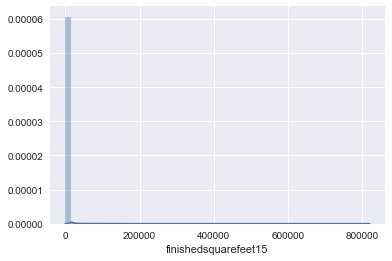

In [6]:
sns.distplot(feet15_df)

In [7]:
# values를 표준화한 z1 만들기
# 동일한 갯수를 가진, 표준화한 정규분포 z2 만들기
# z1, z2 그래프 비교

def norm_test(df, length, a=-10, b=10):
    y1 = df.values
    z1 = sp.stats.zscore(y1)

    N = length
    x1 = sp.stats.norm(0, 1).rvs(N)
    z2 = sp.stats.zscore(x1)

    z3 = sp.stats.ks_2samp(z1, z2)
    
    np.random.seed(0)
    plt.xlim([a, b])
    sns.distplot(z1)
    sns.distplot(z2)
    plt.show()

    return np.mean(z1), np.mean(z2), np.std(z1), np.std(z2), z3

/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


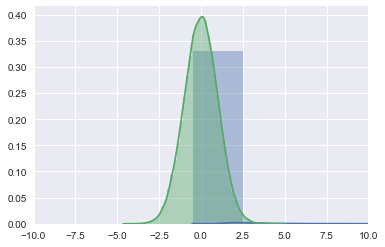

(-3.0239347447939778e-17,
 -5.9398718201310277e-18,
 0.99999999999999978,
 1.0,
 Ks_2sampResult(statistic=0.36216836654472268, pvalue=0.0))

In [8]:
# feet15는 균등분포를 이룬다

norm_test(feet15_df, len(feet15_df))

In [ ]:
# 'calculatedfinishedsquarefeet'

In [10]:
calfeet_df = df['calculatedfinishedsquarefeet'].dropna()
calfeet_df.tail()

2973774    4582.0
2973775     798.0
2973776    1526.0
2973777    2110.0
2973778    1040.0
Name: calculatedfinishedsquarefeet, dtype: float64

/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


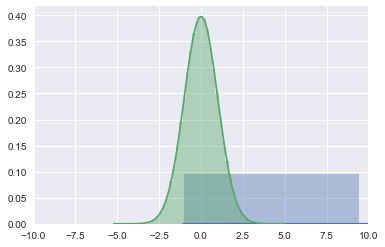

(-4.3074191020296539e-18,
 -1.076127170929368e-17,
 0.99999999999999989,
 1.0000000000000002,
 Ks_2sampResult(statistic=0.24999863465012229, pvalue=0.0))

In [11]:
norm_test(calfeet_df, len(calfeet_df), -10, 10)

In [ ]:
# 'calculatedbathnbr'

/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


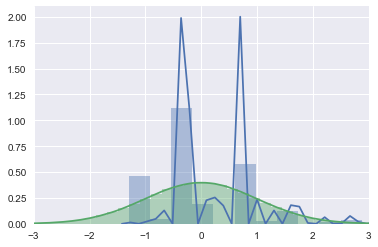

(1.6239242584534683e-17,
 -1.8547762363708732e-17,
 1.0000000000000002,
 1.0000000000000004,
 Ks_2sampResult(statistic=0.23486812507767907, pvalue=0.0))

In [12]:
calbath_df = df['calculatedbathnbr'].dropna()
norm_test(calbath_df, len(calbath_df), -3, 3)

In [ ]:
# 'taxvaluedollarcnt'

In [ ]:
taxval_df = df['taxvaluedollarcnt'].fillna(0)
norm_test(taxval_df, len(taxval_df), -10, 10)

In [ ]:
# 'taxamount'

In [ ]:
taxamount_df = df['taxamount'].fillna(0)
norm_test(taxamount_df, len(taxamount_df), -10, 10)

In [ ]:
plt.xlim([0, 100000])
sns.distplot(taxamount_df.values)
plt.show()

taxamount_df.values

In [ ]:
x1 = taxval_df.values / taxamount_df.values
plt.plot(x1)

In [ ]:
s1 = sp.stats.zscore(taxval_df.values)
s2 = sp.stats.zscore(taxamount_df.values)
x1 = taxval_df.values
x2 = taxamount_df.values

plt.plot(s1, alpha=0.5)
plt.plot(s2, alpha=0.5)
plt.show

In [ ]:
sp.stats.ks_2samp(taxval_df, taxamount_df)

In [ ]:
# 'lotsizesquarefeet'

In [ ]:
extnintsize = ['lotsizesquarefeet', 'calculatedfinishedsquarefeet']

extnintsize_df = pd.DataFrame(columns=extnintsize)
extnintsize_df

In [ ]:
for i in extnintsize:
    extnintsize_df[i] = sp.stats.modf[i].values
result_df = extnintsize_df.

In [ ]:
result_df = extnintsize_df.dropna().fillna(0)
result_df

In [ ]:
plt.xlim([0, 10000000])
sns.distplot(result_df['lotsizesquarefeet'])

In [ ]:
norm_test(result_df, len(result_df))

In [ ]:
import statsmodels.api as sm

In [ ]:
finishedsquare = ['finishedsquarefeet6', 'finishedsquarefeet12',\
                                          'finishedsquarefeet13', 'finishedsquarefeet15']
finishedsquare_df = pd.DataFrame(columns=finishedsquare)
for i in finishedsquare:
    finishedsquare_df[i] = df[i]
finishedsquare_df.head()

In [ ]:
finishedsquare_df = finishedsquare_df.fillna(0)
dfX = sm.add_constant(finishedsquare_df)

In [ ]:
df['calculatedfinishedsquarefeet']

In [ ]:
model_feet = sm.OLS(finishedsquare_df, calfeet_df)
result_feet = model_feet.fit()

In [ ]:
result_feet.summary()

## _structuretaxvaluedollarcnt & finishedsquarefeet12_

- 상관계수 : 0.704023858

In [34]:
sum(df['finishedsquarefeet12'].isna()), sum(df['structuretaxvaluedollarcnt'].isna())

(276033, 54982)

In [35]:
samples_1 = ['finishedsquarefeet12', 'structuretaxvaluedollarcnt']
samples_1

samples_1_df = pd.DataFrame(columns=samples_1)
for i in samples_1:
    samples_1_df[i] = df[i]
samples_1_df.tail()

,finishedsquarefeet12,structuretaxvaluedollarcnt
2985212,NaN,NaN
2985213,NaN,NaN
2985214,NaN,NaN
2985215,NaN,NaN
2985216,NaN,NaN


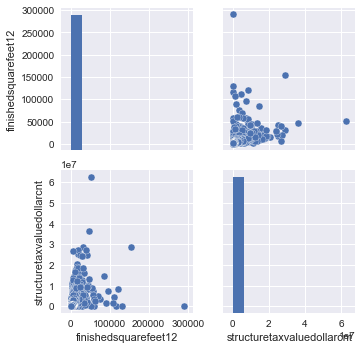

In [36]:
# pairplot으로 비교하기

result_1_df = samples_1_df.dropna().fillna(0)
result_1_df.tail()

sns.pairplot(result_1_df)
plt.show()

In [48]:
result_1_df.head()

,finishedsquarefeet12,structuretaxvaluedollarcnt
18,4000.0,56736.0
19,3633.0,218982.0
28,1090.0,229399.0
29,1620.0,334432.0
31,2077.0,207035.0


In [51]:
result_1_df.iloc[:,:1].tail()

,finishedsquarefeet12
2973772,1652.0
2973775,798.0
2973776,1526.0
2973777,2110.0
2973778,1040.0


/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


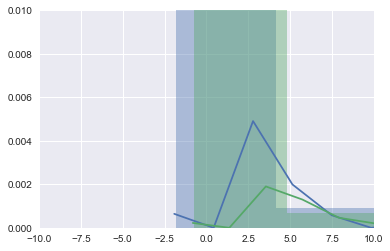

In [105]:
y1 = result_1_df.iloc[:,:1].values
z1 = sp.stats.zscore(y1)

y2 = result_1_df.iloc[:,1:]
z2 = sp.stats.zscore(y2)

np.random.seed(0)

plt.xlim([-10, 10])
plt.ylim([0, 0.01])
sns.distplot(z1, kde=True, norm_hist=True)
sns.distplot(z2, kde=True)
plt.show()

## _카테고리 변수 간 상관관계 구하기(카이 제곱 검정)_

In [ ]:
# 'landtaxvaluedollarcnt'

In [99]:
samples_2_df = df.iloc[:10, -10:-3]
samples_2_df

,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount
0,NaN,NaN,NaN,9.0,2015.0,9.0,NaN
1,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN
2,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37
3,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57
4,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17
5,1.0,NaN,176383.0,283315.0,2015.0,106932.0,3661.28
6,NaN,NaN,397945.0,554573.0,2015.0,156628.0,6773.34
7,1.0,NaN,101998.0,688486.0,2015.0,586488.0,7857.84
8,NaN,NaN,NaN,9.0,2015.0,9.0,NaN
9,1.0,NaN,218440.0,261201.0,2015.0,42761.0,4054.76


In [101]:
samples_2_df = df.iloc[:10, -10:-9]
samples_2_df.dropna()

,numberofstories
3,1.0
5,1.0
7,1.0
9,1.0


/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


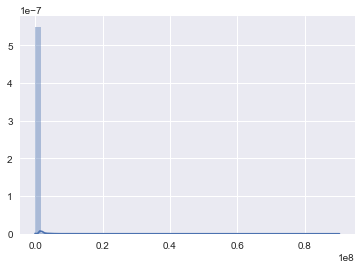

In [86]:
x = samples_2_df

sns.distplot(x)
plt.show()

In [ ]:
obs = np.array([[10, 10, 20], [20, 20, 20]])
sp.stats.chi2_contingency(obs)

/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


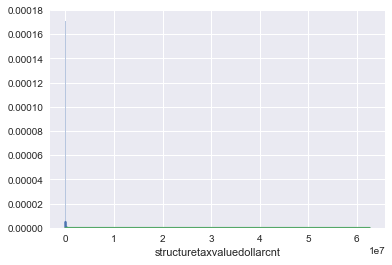

In [37]:
x1 = result_1_df['finishedsquarefeet12']
x2 = result_1_df['structuretaxvaluedollarcnt']
sns.distplot(x1)
sns.distplot(x2)
plt.show()

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()
print(result_boston.summary())
fig = sm.graphics.plot_regress_exog(result_boston, "CRIM")
plt.show()